In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from rich.progress import track
import os
from itertools import combinations
from numpy import array

In [41]:
# with open('readings_timeid_sa1.pkl','wb') as f:
    # pickle.dump(new_result,f)

#load
# with open('readings_timeid_sa1.pkl','rb') as f:
#     new_result = pickle.load(f)

with open('readings_timeid.pkl','rb') as f:
    results = pickle.load(f)
# len(total_id_list)
results_ones = np.zeros_like(results)
results_ones[np.where(results > 0)] = 1


In [42]:
with open('readings_timeid_sa2.pkl','rb') as f:
    nnew_results = pickle.load(f)

nnew_results_ones = np.zeros_like(nnew_results)
nnew_results_ones[np.where(nnew_results > 0)] = 1


In [5]:
total_id_list = [  
         3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122]

In [6]:
nnew_id_list = [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 92, 93, 94, 96, 97, 98, 100, 103, 104, 109, 111, 122]

In [15]:
id_map = {}

id_records = np.zeros(np.max(total_id_list)+1)
new_id_records = np.zeros(np.max(total_id_list)+1)

for id in total_id_list:
    records_num = len(np.where(results.T[id] != 0)[0])
    # id_map[id] = records_num
    id_records[id] = records_num

for id in nnew_id_list:
    records_num = len(np.where(nnew_results.T[id] != 0)[0])
    new_id_records[id] = records_num

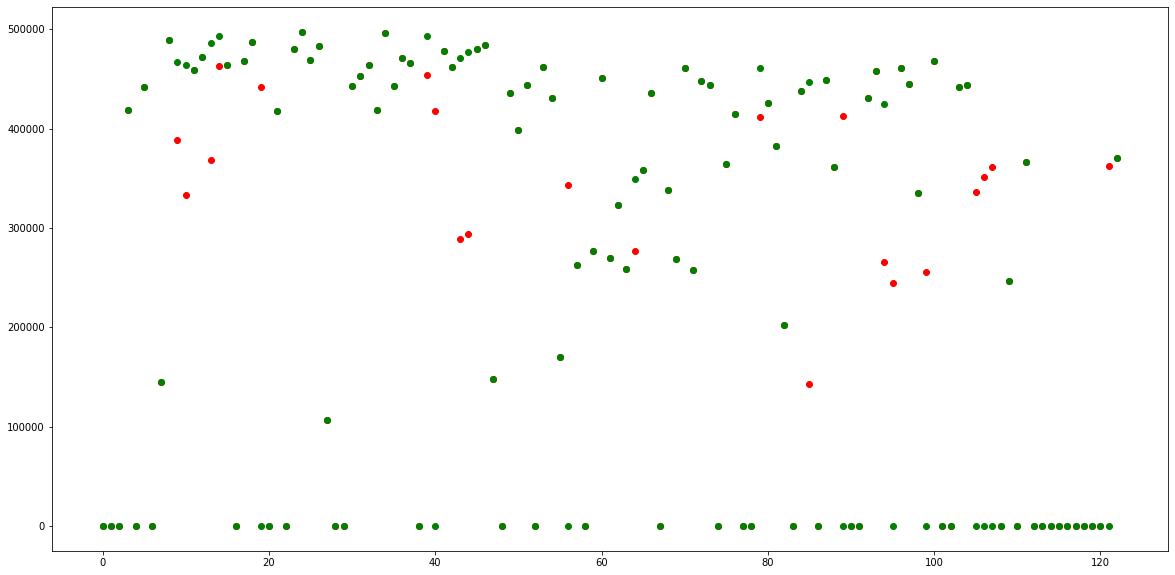

In [20]:
plt.figure(figsize=(20,10))
plt.plot(id_records,'ro')
plt.plot(new_id_records,'go')

<BarContainer object of 123 artists>

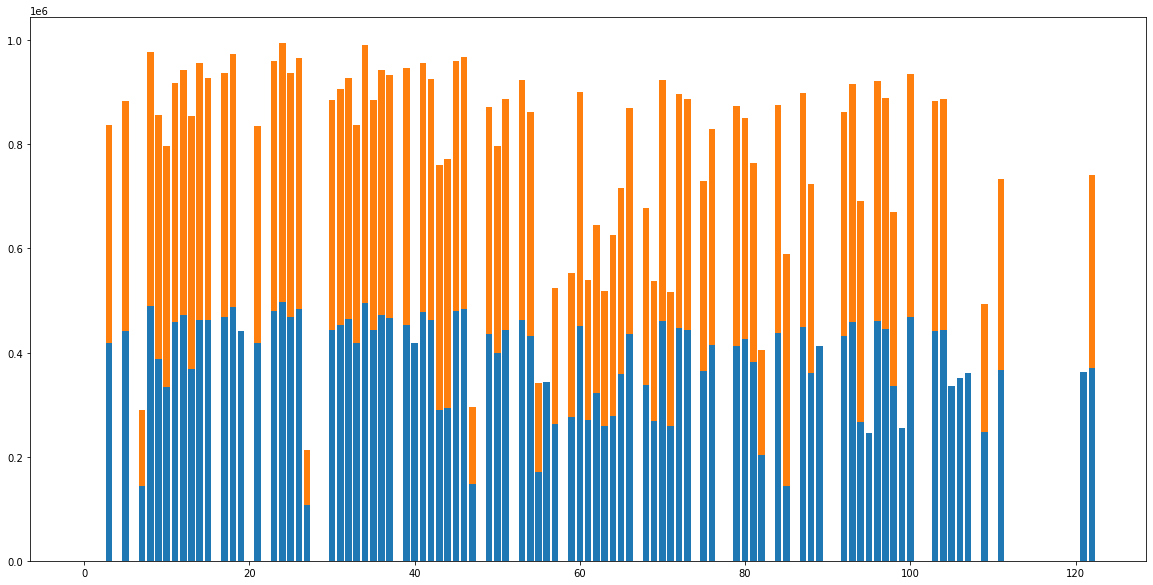

In [32]:
plt.figure(figsize=(20,10))
plt.bar(np.linspace(0,122,123,dtype=int),id_records)
plt.bar(np.linspace(0,122,123,dtype=int),new_id_records,bottom=id_records)

In [130]:
# SA 搞定
# 如何在时间的均匀度上体现
# 将所有传感器在时间轴上取交集，即最终可以用来训练的部分
# 算比例，可以得到数据帧的数量对比

intersection = np.ones(745*686)

for id in total_id_list[:5]:
    intersection = intersection * results_ones.T[id]

intersection_new = np.ones(745*686)

for id in nnew_id_list[:10]:
    intersection_new = intersection_new * nnew_results_ones.T[id]

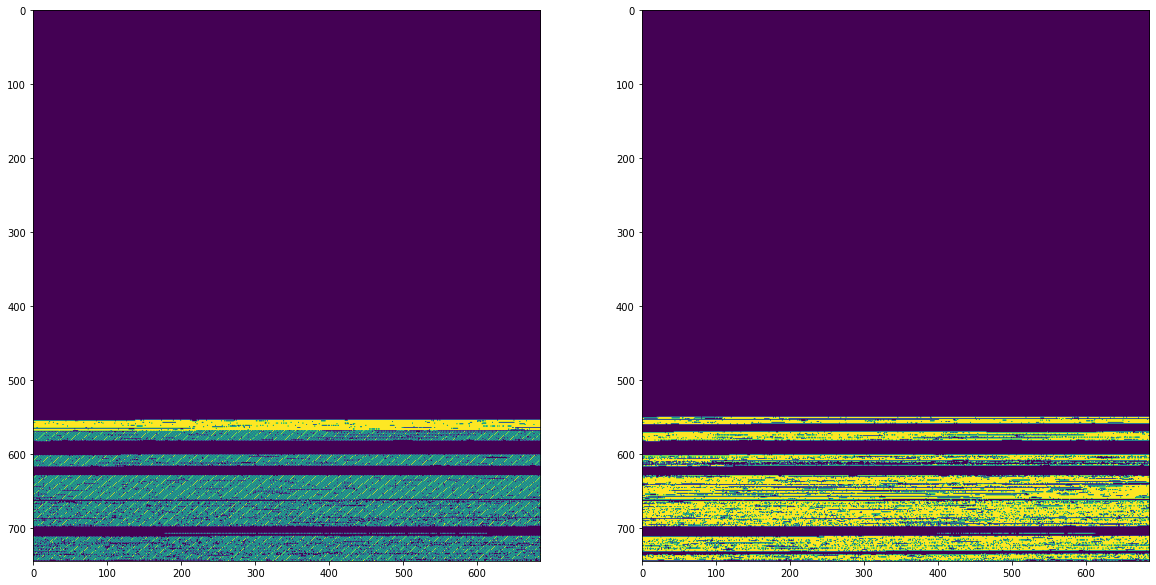

In [131]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(intersection.reshape(745,686))
plt.subplot(122)
plt.imshow((intersection_new).reshape(745,686))
# plt.colorbar()

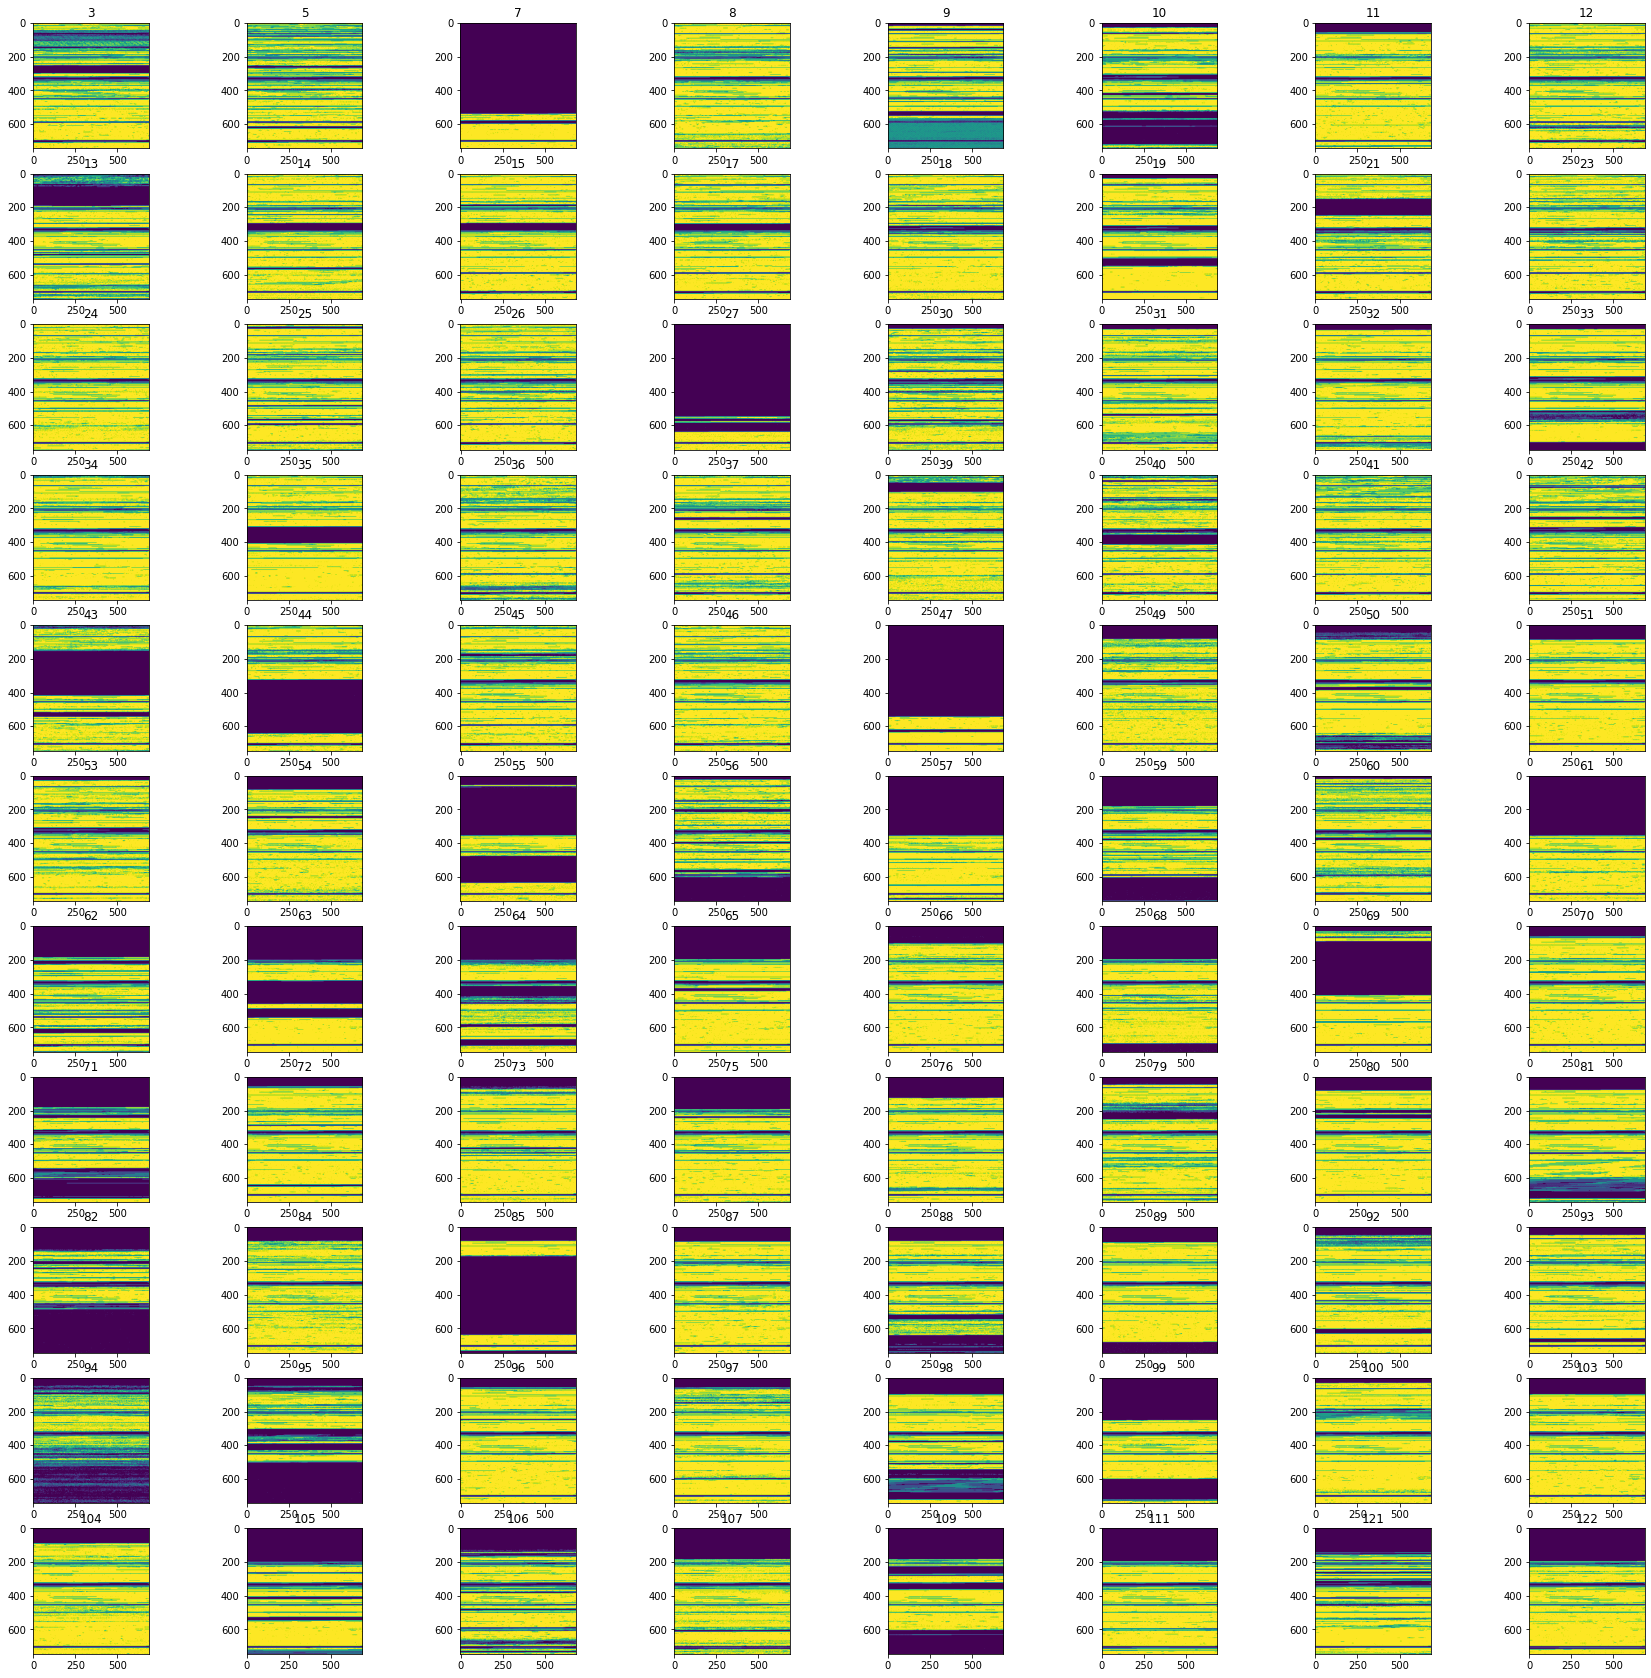

In [75]:
fig,axs = plt.subplots(11,8,figsize=(30,30))
for i in range(0,11):
    for j in range(0,8):
        axs[i][j].imshow(results_ones.T[total_id_list[i*8+j]].reshape(745,686))
        axs[i][j].set_title(total_id_list[i*8+j])
fig.savefig('id_timedist.png',dpi=300,pad_inches=0,bbox_inches='tight')

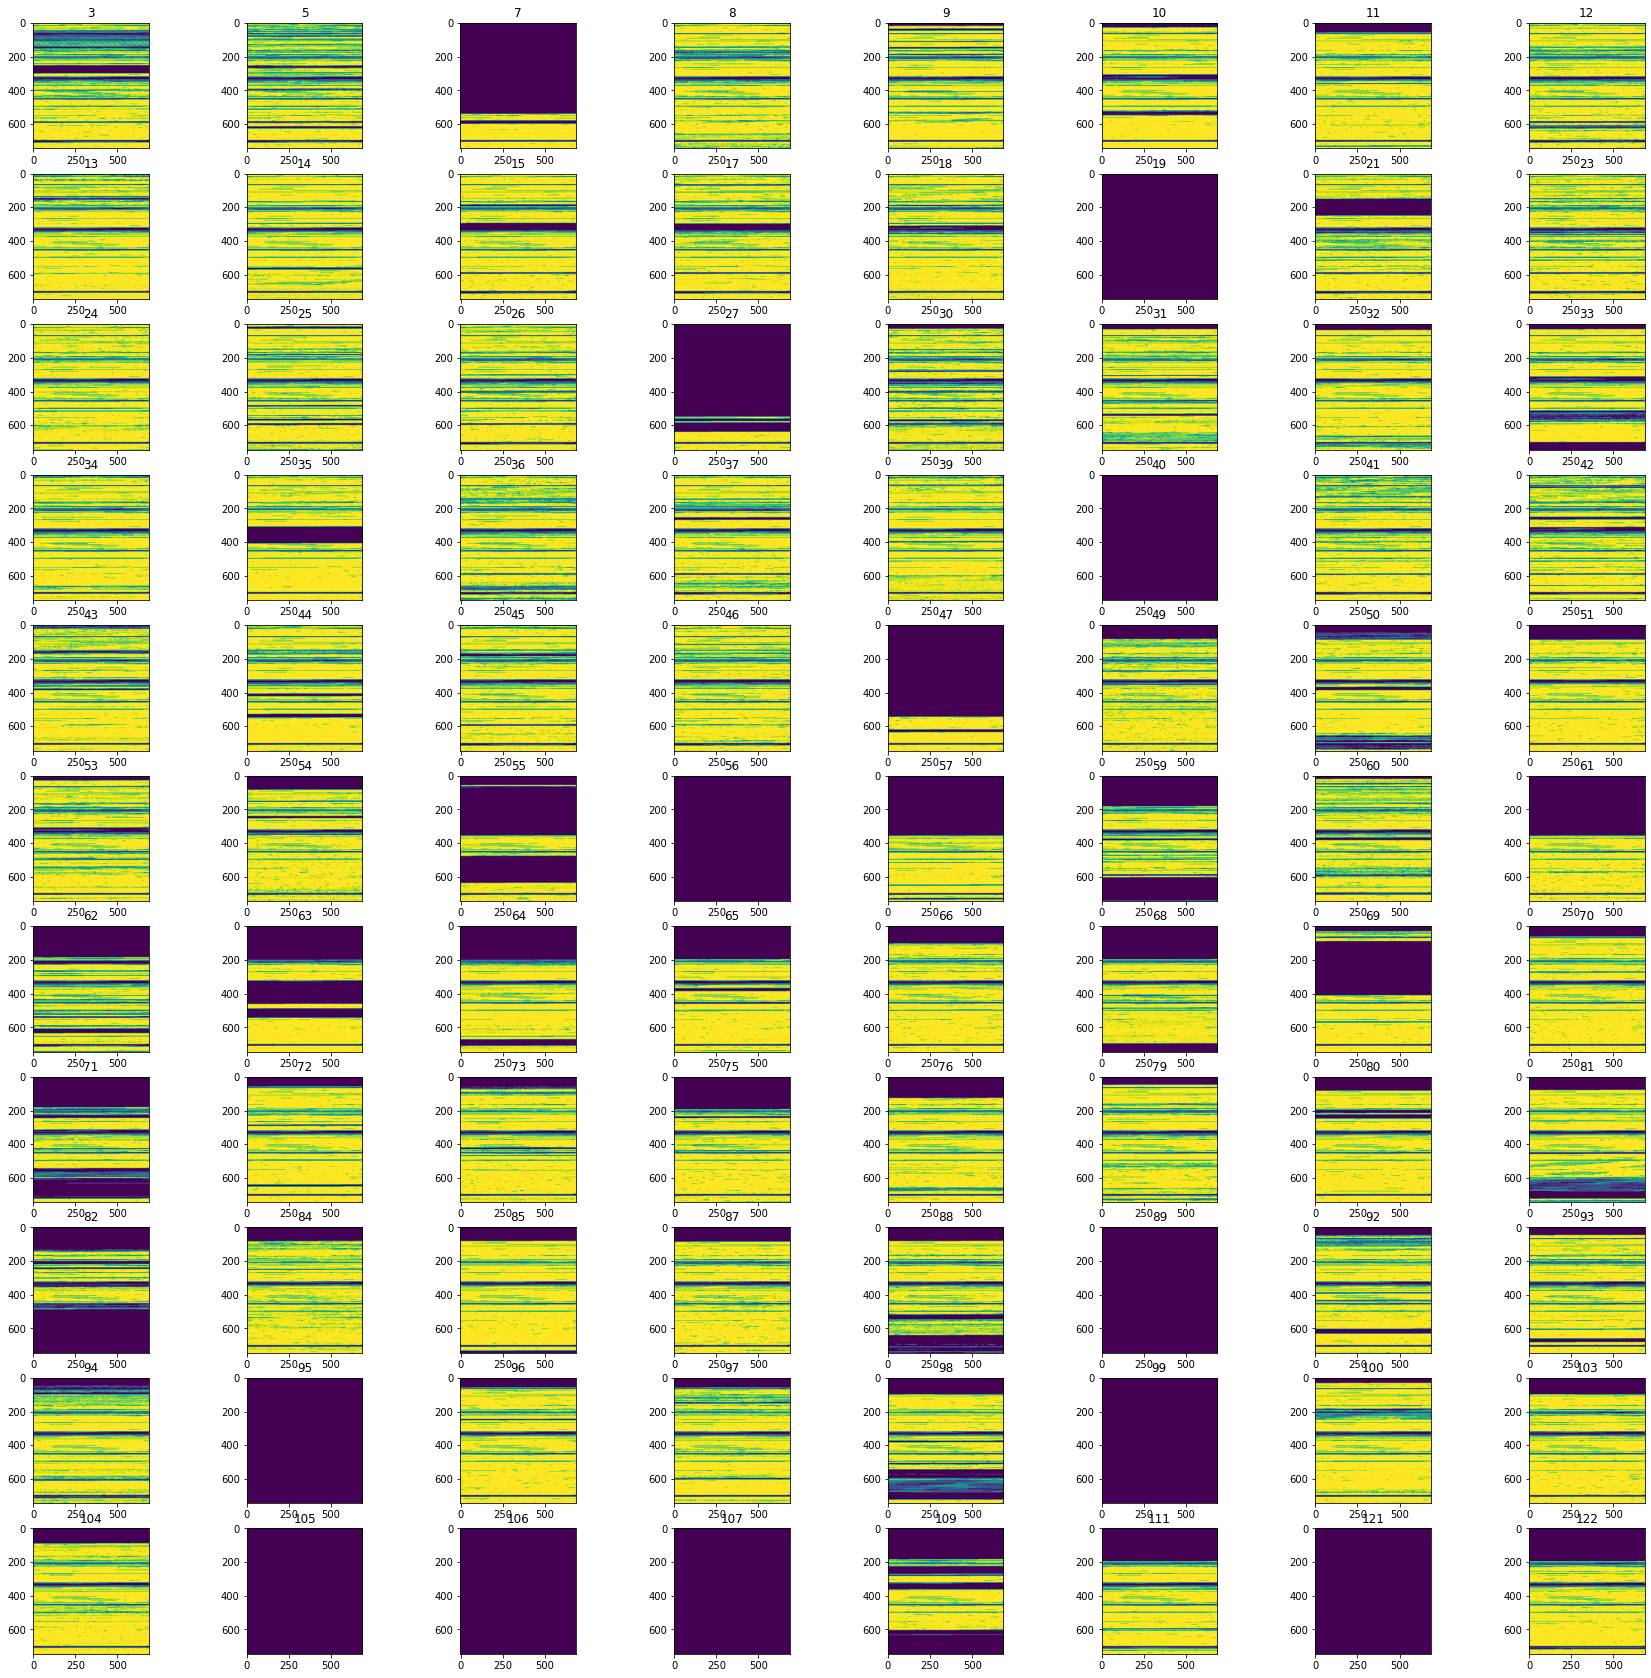

In [76]:
fig,axs = plt.subplots(11,8,figsize=(30,30))
for i in range(0,11):
    for j in range(0,8):
        axs[i][j].imshow(nnew_results_ones.T[total_id_list[i*8+j]].reshape(745,686))
        axs[i][j].set_title(total_id_list[i*8+j])
fig.savefig('id_timedist_new.png',dpi=300,pad_inches=0,bbox_inches='tight')

## 原始版本

In [136]:
# 原始版本
exclusion_list = []

steps = []

# origin_total_id_list = np.array(total_id_list.copy(),dtype=int)
origin_total_id_list = np.zeros(123,dtype=int)
for id in total_id_list:
    origin_total_id_list[id] = id

# print(origin_total_id_list)

product = np.ones_like(745*686)

product_pics = []

i = 0

current_product_list = []

while len(np.where(origin_total_id_list == 0)[0]) != len(origin_total_id_list) and i != 89:
    tmp_product = np.zeros(123)
    for id in origin_total_id_list:
        if id != 0:
            tmp = product * results_ones.T[id]
            tmp_product[id] = len(np.where(tmp == 1)[0])
    
    max_tmp_product = np.max(tmp_product)
    current_product_list.append(max_tmp_product)
    print(max_tmp_product)
    steps_id = np.where(tmp_product == max_tmp_product)[0][0]

    origin_total_id_list[steps_id] = 0
    steps.append(steps_id)
    
    product = product * results_ones.T[steps_id]

    product_pics.append(product.copy())
    
    print(i,steps_id)
    print('-------')
    i += 1


444344.0
0 24
-------
422532.0
1 34
-------
404191.0
2 46
-------
388182.0
3 8
-------
373815.0
4 45
-------
359455.0
5 23
-------
347720.0
6 26
-------
333379.0
7 12
-------
317817.0
8 41
-------
301649.0
9 18
-------
291375.0
10 15
-------
285628.0
11 17
-------
270735.0
12 14
-------
256743.0
13 25
-------
242885.0
14 36
-------
229112.0
15 32
-------
221020.0
16 100
-------
209926.0
17 93
-------
199507.0
18 11
-------
196224.0
19 70
-------
191142.0
20 96
-------
182463.0
21 51
-------
179110.0
22 87
-------
173266.0
23 54
-------
167455.0
24 104
-------
160642.0
25 103
-------
157955.0
26 66
-------
153879.0
27 39
-------
147609.0
28 49
-------
141835.0
29 97
-------
135705.0
30 84
-------
129247.0
31 76
-------
122719.0
32 80
-------
115721.0
33 53
-------
108292.0
34 111
-------
106577.0
35 122
-------
103922.0
36 75
-------
99452.0
37 107
-------
94660.0
38 21
-------
89355.0
39 79
-------
83800.0
40 13
-------
79269.0
41 73
-------
74523.0
42 89
-------
71308.0
43 68
-------


In [137]:
steps

[24,
 34,
 46,
 8,
 45,
 23,
 26,
 12,
 41,
 18,
 15,
 17,
 14,
 25,
 36,
 32,
 100,
 93,
 11,
 70,
 96,
 51,
 87,
 54,
 104,
 103,
 66,
 39,
 49,
 97,
 84,
 76,
 80,
 53,
 111,
 122,
 75,
 107,
 21,
 79,
 13,
 73,
 89,
 68,
 31,
 30,
 106,
 60,
 50,
 65,
 42,
 5,
 37,
 121,
 105,
 72,
 3,
 61,
 57,
 109,
 99,
 56,
 81,
 59,
 62,
 88,
 33,
 71,
 10,
 9,
 98,
 19,
 95,
 55,
 82,
 94,
 92,
 69,
 40,
 35,
 43,
 64,
 63,
 0,
 0,
 0,
 0,
 0,
 0]

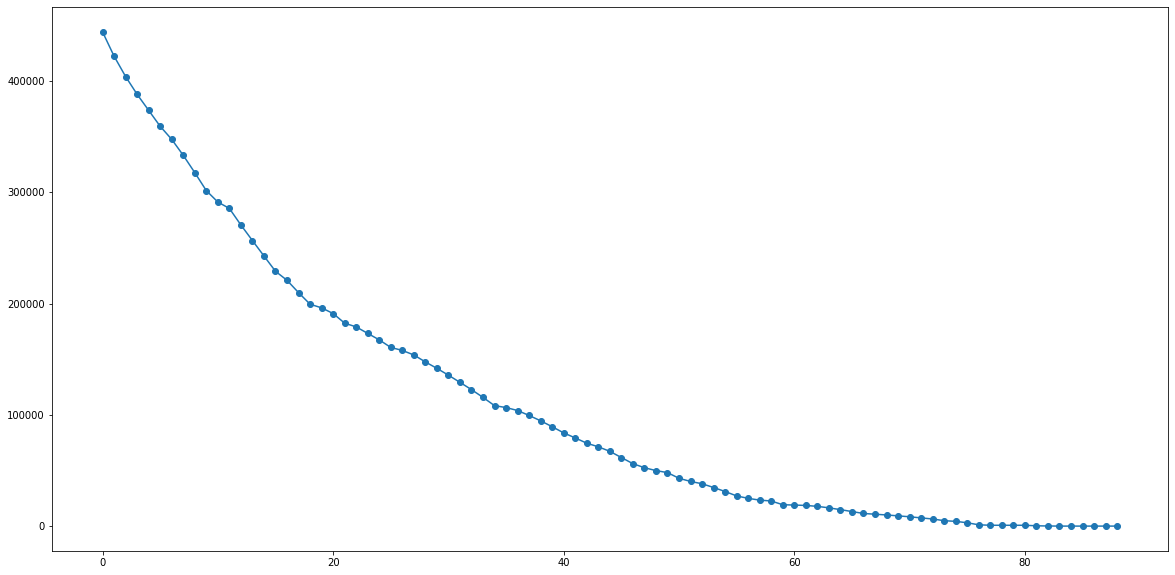

In [138]:
plt.figure(figsize=(20,10))
plt.plot(current_product_list,'o-')

/tmp/ipykernel_1473560/1789238291.py:3: RuntimeWarning: invalid value encountered in true_divide
  ratio = diff / current_product_list[:-1]


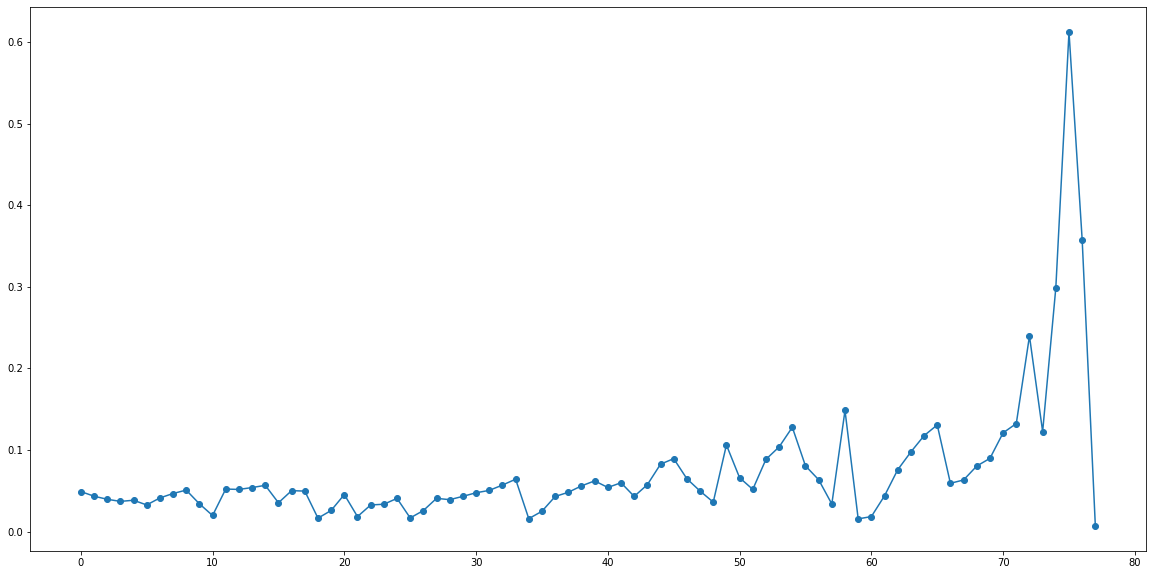

In [139]:
plt.figure(figsize=(20,10))
diff = np.abs(np.diff(current_product_list))
ratio = diff / current_product_list[:-1]
# ratio = ratio * 100
# plt.figure(figsize=(20,20))
plt.plot(ratio[:-10],'o-')
# plt.show()

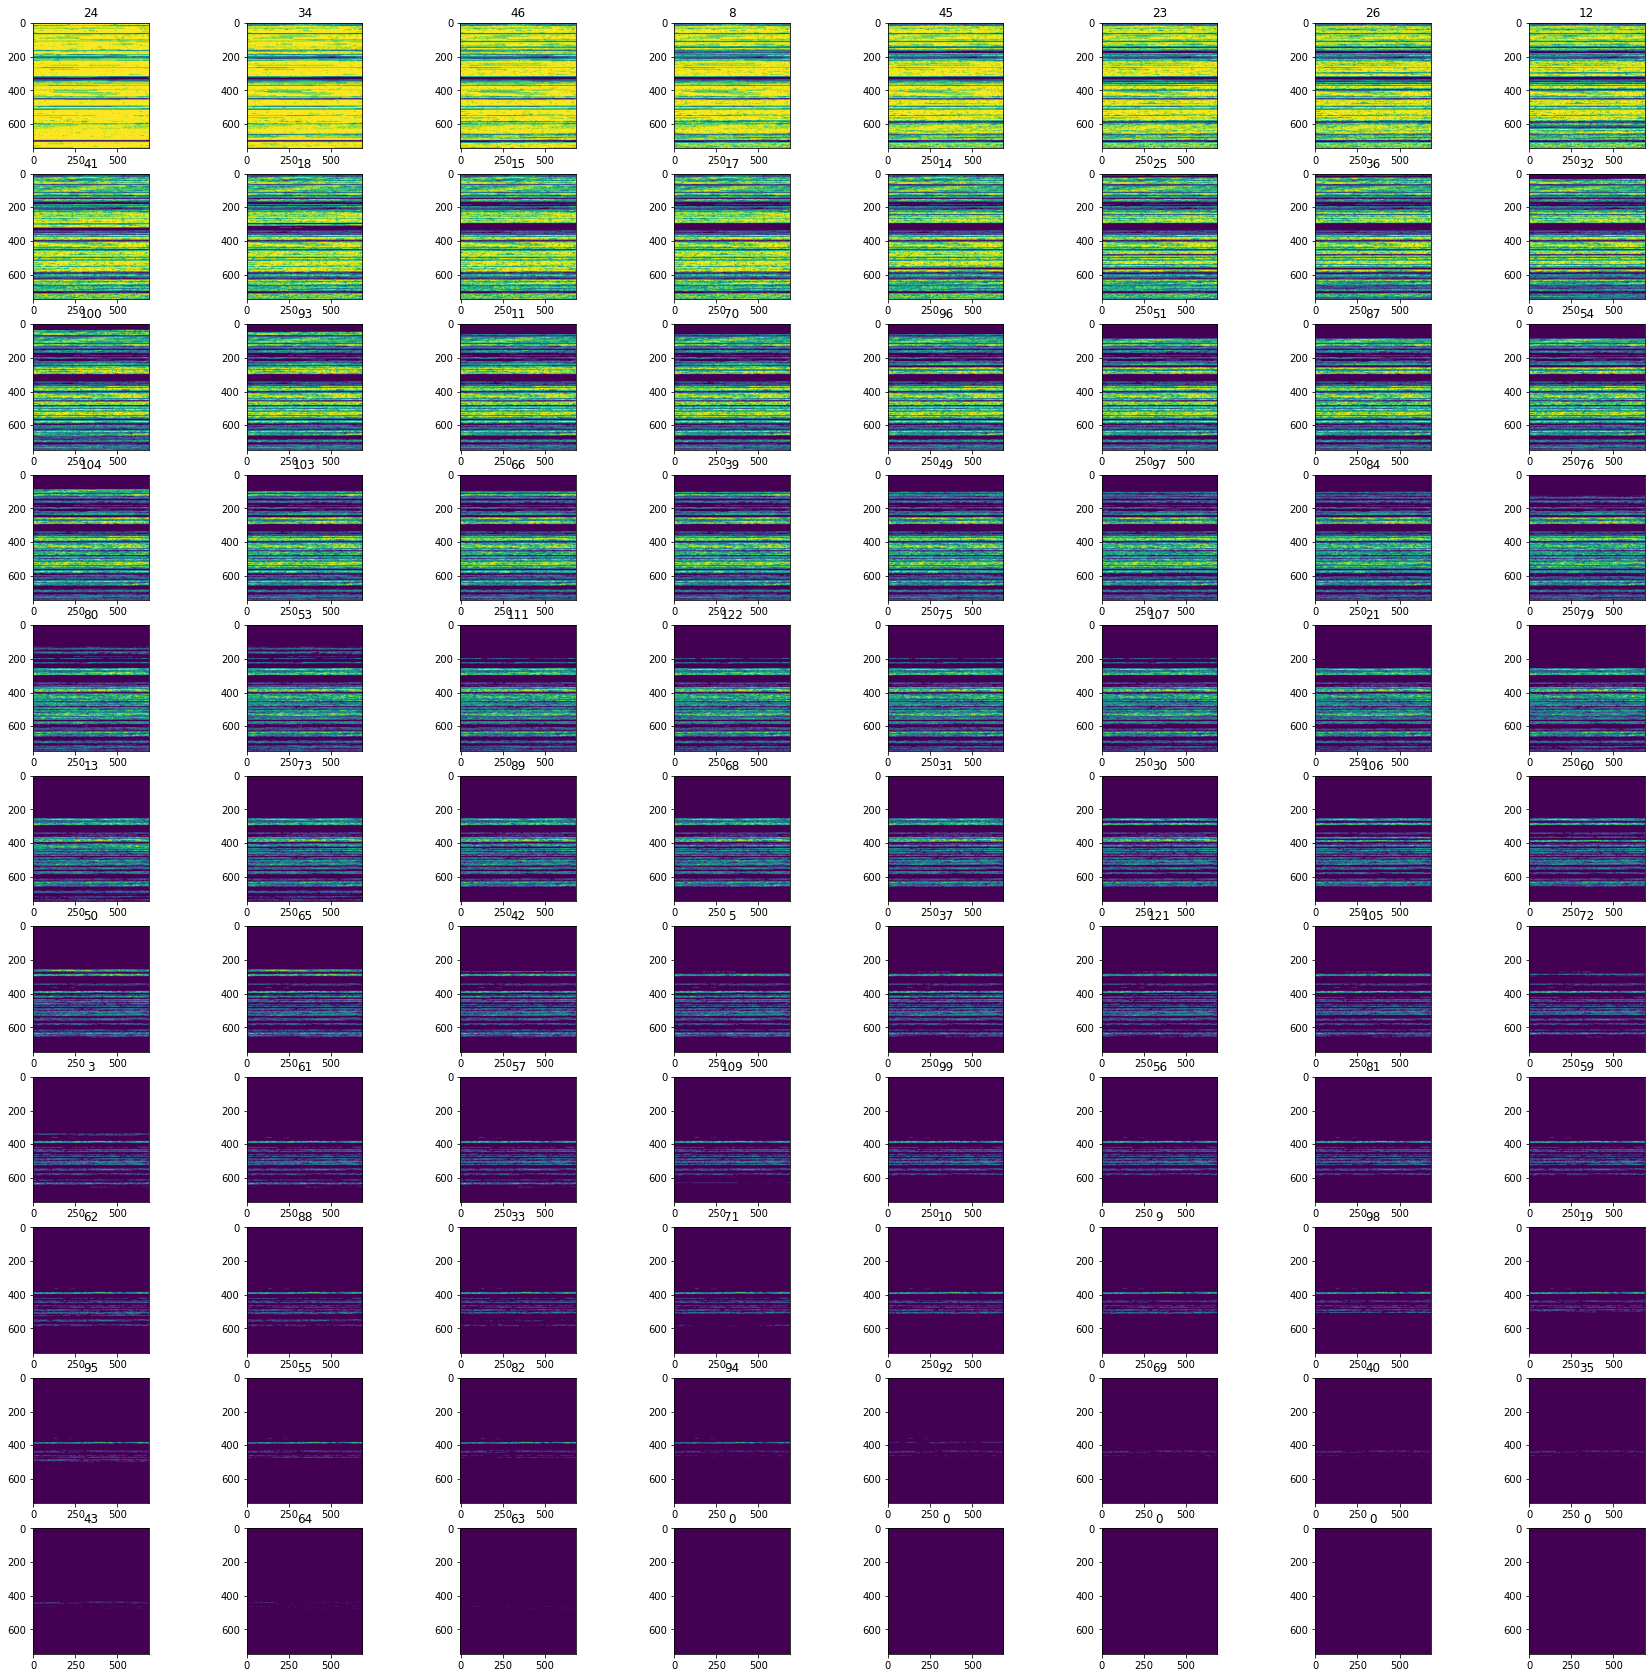

In [106]:
fig,axs = plt.subplots(11,8,figsize=(30,30))
for i in range(0,11):
    for j in range(0,8):
        axs[i][j].imshow(product_pics[i*8+j].reshape(745,686))
        axs[i][j].set_title(steps[i*8+j])
fig.savefig('product_steps.png',dpi=300,pad_inches=0,bbox_inches='tight')

## SA后的版本

In [140]:
# SA版本
new_exclusion_list = []

nnew_steps = []

# origin_total_id_list = np.array(total_id_list.copy(),dtype=int)
nnew_origin_total_id_list = np.zeros(123,dtype=int)
for id in nnew_id_list:
    nnew_origin_total_id_list[id] = id

# print(origin_total_id_list)

nnew_product = np.ones_like(745*686)

nnew_product_pics = []

i = 0

nnew_current_product_list = []

while len(np.where(nnew_origin_total_id_list == 0)[0]) != len(nnew_origin_total_id_list) and i != 89:
    tmp_product = np.zeros(123)
    for id in nnew_origin_total_id_list:
        if id != 0:
            tmp = nnew_product * nnew_results_ones.T[id]
            tmp_product[id] = len(np.where(tmp == 1)[0])
    
    max_tmp_product = np.max(tmp_product)
    nnew_current_product_list.append(max_tmp_product)
    print(max_tmp_product)
    nnew_steps_id = np.where(tmp_product == max_tmp_product)[0][0]

    nnew_origin_total_id_list[nnew_steps_id] = 0
    nnew_steps.append(nnew_steps_id)
    
    nnew_product = nnew_product * nnew_results_ones.T[nnew_steps_id]

    nnew_product_pics.append(nnew_product.copy())
    
    print(i,nnew_steps_id)
    print('-------')
    i += 1

444344.0
0 24
-------
430863.0
1 39
-------
410377.0
2 14
-------
394432.0
3 34
-------
377219.0
4 46
-------
362064.0
5 8
-------
348467.0
6 45
-------
337222.0
7 26
-------
326124.0
8 23
-------
314772.0
9 13
-------
301643.0
10 12
-------
288544.0
11 41
-------
275878.0
12 18
-------
266124.0
13 15
-------
260675.0
14 17
-------
248016.0
15 25
-------
236252.0
16 9
-------
224208.0
17 32
-------
215443.0
18 79
-------
206398.0
19 100
-------
197583.0
20 10
-------
188902.0
21 11
-------
185623.0
22 70
-------
180660.0
23 96
-------
173703.0
24 51
-------
170670.0
25 87
-------
166961.0
26 85
-------
161153.0
27 104
-------
155495.0
28 54
-------
149215.0
29 53
-------
142792.0
30 49
-------
136879.0
31 97
-------
131264.0
32 84
-------
125590.0
33 103
-------
123699.0
34 66
-------
118503.0
35 94
-------
113138.0
36 36
-------
109318.0
37 93
-------
104599.0
38 31
-------
99107.0
39 76
-------
95283.0
40 122
-------
93773.0
41 111
-------
89593.0
42 75
-------
85302.0
43 80
-------


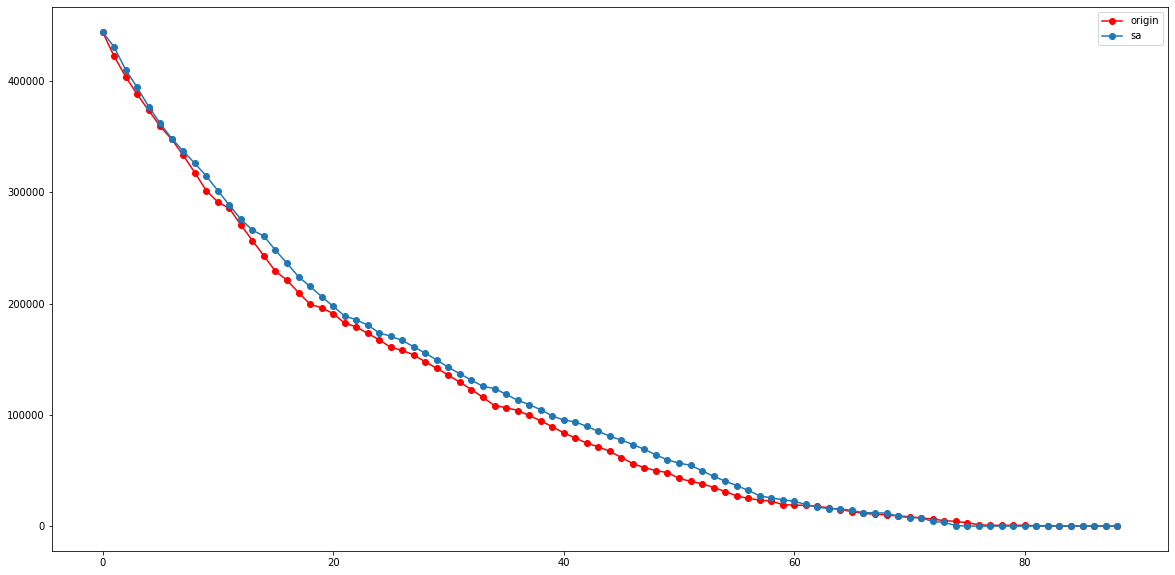

In [145]:
plt.figure(figsize=(20,10))
plt.plot(current_product_list,'ro-',label='origin')
plt.plot(nnew_current_product_list,'o-',label='sa')
plt.legend()

18904.0
(array([15]),)


/tmp/ipykernel_1473560/4168125272.py:2: RuntimeWarning: invalid value encountered in true_divide
  current_diff_ratio = current_diff / np.array(current_product_list)


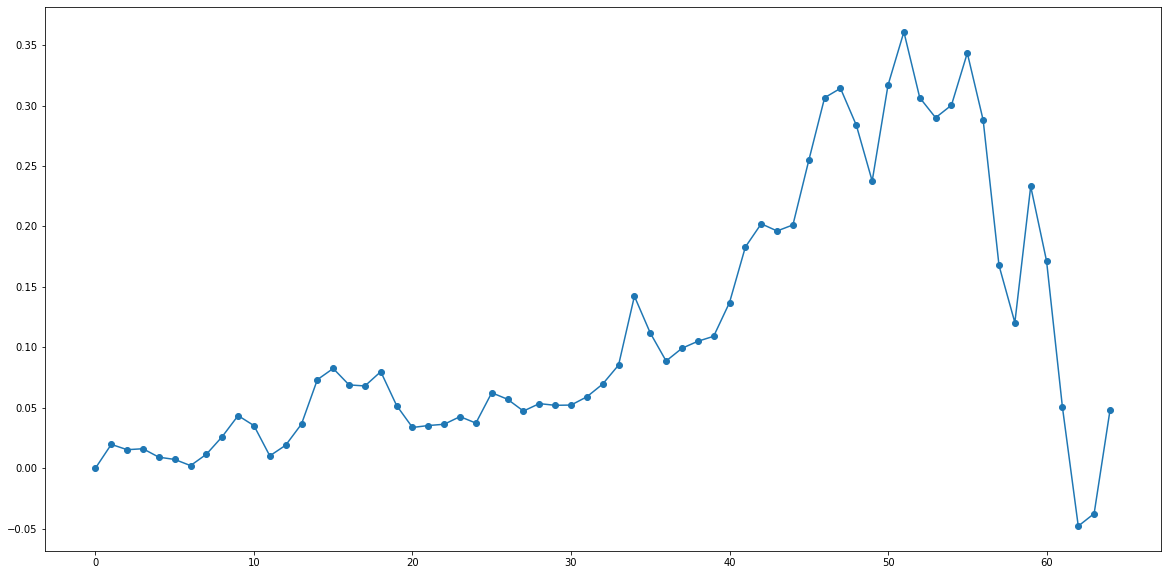

In [159]:
current_diff = np.array(nnew_current_product_list)- np.array(current_product_list)
current_diff_ratio = current_diff / np.array(current_product_list)
print(np.max(current_diff))
print(np.where(current_diff == np.max(current_diff)))
plt.figure(figsize=(20,10))
plt.plot(current_diff_ratio[:65],'o-')

In [142]:
for i in range(0,len(steps)):
    print(i,steps[i],nnew_steps[i])

0 24 24
1 34 39
2 46 14
3 8 34
4 45 46
5 23 8
6 26 45
7 12 26
8 41 23
9 18 13
10 15 12
11 17 41
12 14 18
13 25 15
14 36 17
15 32 25
16 100 9
17 93 32
18 11 79
19 70 100
20 96 10
21 51 11
22 87 70
23 54 96
24 104 51
25 103 87
26 66 85
27 39 104
28 49 54
29 97 53
30 84 49
31 76 97
32 80 84
33 53 103
34 111 66
35 122 94
36 75 36
37 107 93
38 21 31
39 79 76
40 13 122
41 73 111
42 89 75
43 68 80
44 31 21
45 30 64
46 106 68
47 60 44
48 50 43
49 65 60
50 42 65
51 5 50
52 37 73
53 121 33
54 105 88
55 72 72
56 3 30
57 61 81
58 57 71
59 109 98
60 99 59
61 56 62
62 81 42
63 59 37
64 62 5
65 88 109
66 33 61
67 71 3
68 10 57
69 9 92
70 98 69
71 19 35
72 95 55
73 55 82
74 82 63
75 94 0
76 92 0
77 69 0
78 40 0
79 35 0
80 43 0
81 64 0
82 63 0
83 0 0
84 0 0
85 0 0
86 0 0
87 0 0
88 0 0


In [319]:
print(nnew_steps)

[24, 39, 14, 34, 46, 8, 45, 26, 23, 13, 12, 41, 18, 15, 17, 25, 9, 32, 79, 100, 10, 11, 70, 96, 51, 87, 85, 104, 54, 53, 49, 97, 84, 103, 66, 94, 36, 93, 31, 76, 122, 111, 75, 80, 21, 64, 68, 44, 43, 60, 65, 50, 73, 33, 88, 72, 30, 81, 71, 98, 59, 62, 42, 37, 5, 109, 61, 3, 57, 92, 69, 35, 55, 82, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/tmp/ipykernel_1473560/1888881198.py:4: RuntimeWarning: invalid value encountered in true_divide
  ratio = diff / current_product_list[:-1]
/tmp/ipykernel_1473560/1888881198.py:7: RuntimeWarning: invalid value encountered in true_divide
  nnew_ratio = nnew_diff / nnew_current_product_list[:-1]


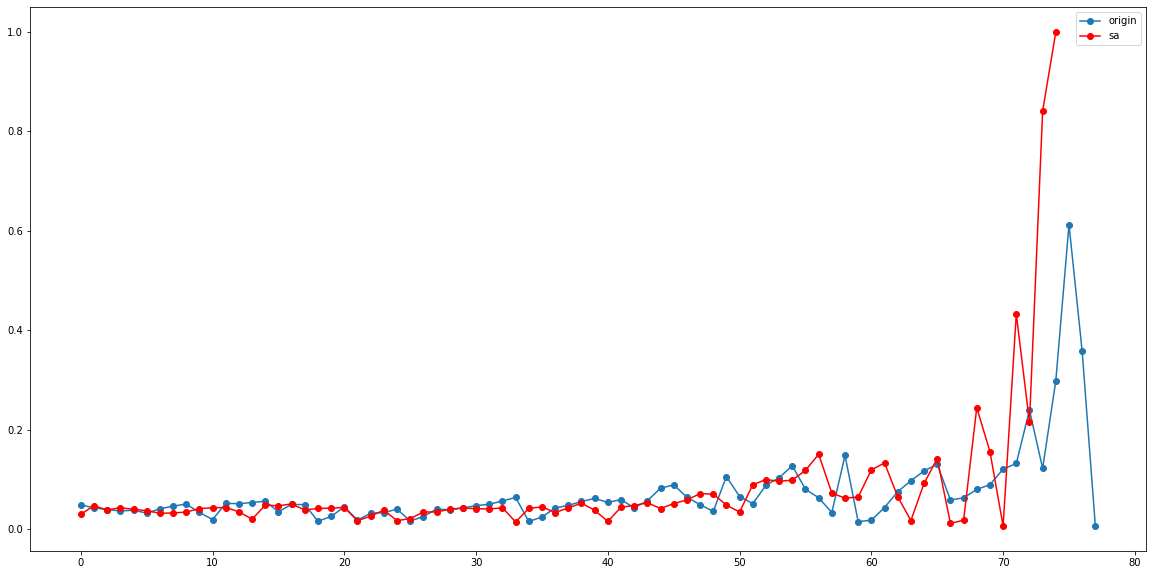

In [148]:
plt.figure(figsize=(20,10))

diff = np.abs(np.diff(current_product_list))
ratio = diff / current_product_list[:-1]

nnew_diff = np.abs(np.diff(nnew_current_product_list))
nnew_ratio = nnew_diff / nnew_current_product_list[:-1]
# ratio = ratio * 100
# plt.figure(figsize=(20,20))
# plt.show()
plt.plot(ratio[:-10],'o-',label='origin')
plt.plot(nnew_ratio[:-10],'ro-',label='sa')
plt.legend()

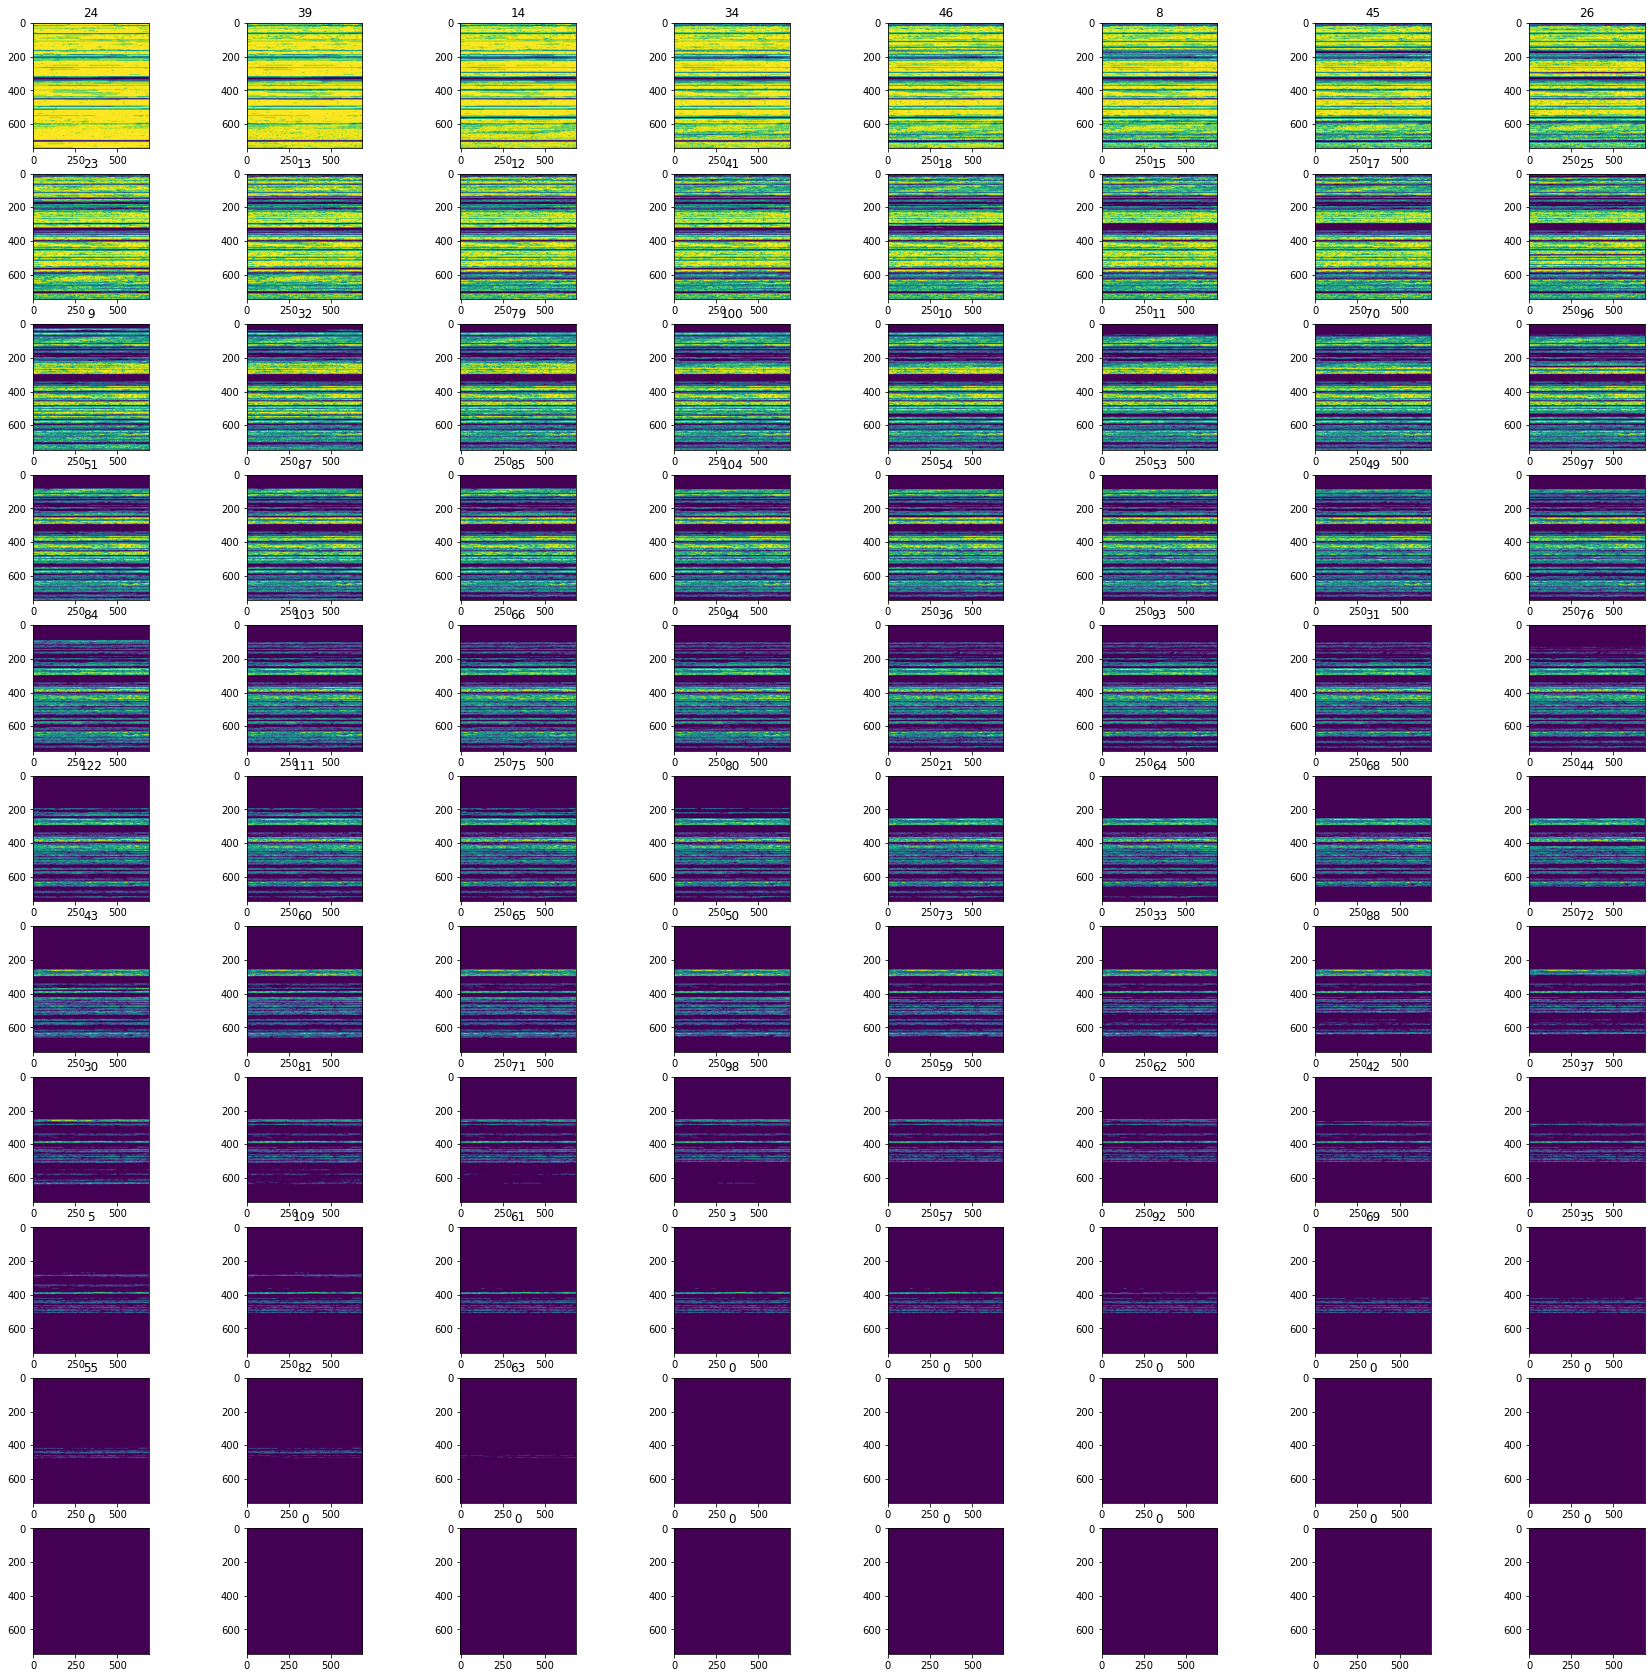

In [149]:
fig,axs = plt.subplots(11,8,figsize=(30,30))
for i in range(0,11):
    for j in range(0,8):
        axs[i][j].imshow(nnew_product_pics[i*8+j].reshape(745,686))
        axs[i][j].set_title(nnew_steps[i*8+j])
fig.savefig('product_steps_sa.png',dpi=300,pad_inches=0,bbox_inches='tight')

In [180]:
a = [10,20,30,40,50,60,51]

for i in a:
    print(current_product_list[i],nnew_current_product_list[i],(nnew_current_product_list[i]-current_product_list[i])*100/current_product_list[i])


291375.0 301643.0 3.523981123981124
191142.0 197583.0 3.3697460526728817
135705.0 142792.0 5.222357319184997
83800.0 95283.0 13.702863961813842
42986.0 56611.0 31.69636625878193
18910.0 22151.0 17.139079851930195
40148.0 54639.0 36.09395237620803


In [320]:
print(current_product_list)

[444344.0, 422532.0, 404191.0, 388182.0, 373815.0, 359455.0, 347720.0, 333379.0, 317817.0, 301649.0, 291375.0, 285628.0, 270735.0, 256743.0, 242885.0, 229112.0, 221020.0, 209926.0, 199507.0, 196224.0, 191142.0, 182463.0, 179110.0, 173266.0, 167455.0, 160642.0, 157955.0, 153879.0, 147609.0, 141835.0, 135705.0, 129247.0, 122719.0, 115721.0, 108292.0, 106577.0, 103922.0, 99452.0, 94660.0, 89355.0, 83800.0, 79269.0, 74523.0, 71308.0, 67206.0, 61651.0, 56139.0, 52504.0, 49895.0, 48093.0, 42986.0, 40148.0, 38070.0, 34698.0, 31095.0, 27118.0, 24933.0, 23348.0, 22559.0, 19209.0, 18910.0, 18562.0, 17748.0, 16403.0, 14801.0, 13061.0, 11353.0, 10681.0, 10005.0, 9201.0, 8375.0, 7361.0, 6386.0, 4855.0, 4260.0, 2987.0, 1157.0, 743.0, 738.0, 732.0, 723.0, 271.0, 94.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [321]:
print(nnew_current_product_list)

[444344.0, 430863.0, 410377.0, 394432.0, 377219.0, 362064.0, 348467.0, 337222.0, 326124.0, 314772.0, 301643.0, 288544.0, 275878.0, 266124.0, 260675.0, 248016.0, 236252.0, 224208.0, 215443.0, 206398.0, 197583.0, 188902.0, 185623.0, 180660.0, 173703.0, 170670.0, 166961.0, 161153.0, 155495.0, 149215.0, 142792.0, 136879.0, 131264.0, 125590.0, 123699.0, 118503.0, 113138.0, 109318.0, 104599.0, 99107.0, 95283.0, 93773.0, 89593.0, 85302.0, 80733.0, 77349.0, 73347.0, 69004.0, 64051.0, 59518.0, 56611.0, 54639.0, 49739.0, 44759.0, 40433.0, 36432.0, 32114.0, 27264.0, 25277.0, 23688.0, 22151.0, 19501.0, 16898.0, 15787.0, 15508.0, 14074.0, 12071.0, 11924.0, 11705.0, 8843.0, 7461.0, 7412.0, 4204.0, 3300.0, 525.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [181]:
origin_se_ids = steps[:50]
sa_se_ids = nnew_steps[:50]

In [183]:
print(origin_se_ids)

[24, 34, 46, 8, 45, 23, 26, 12, 41, 18, 15, 17, 14, 25, 36, 32, 100, 93, 11, 70, 96, 51, 87, 54, 104, 103, 66, 39, 49, 97, 84, 76, 80, 53, 111, 122, 75, 107, 21, 79, 13, 73, 89, 68, 31, 30, 106, 60, 50, 65]


In [216]:
origin_data = results_ones.T[origin_se_ids].copy()

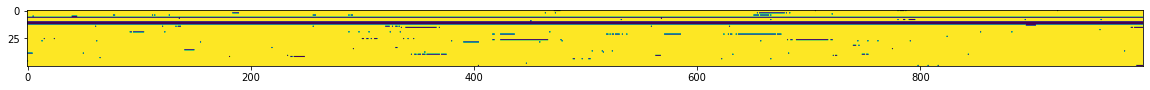

In [220]:
plt.figure(figsize=(20,10))
plt.imshow(origin_data.T[205800:206800].T)

In [310]:
intersection = np.ones(745*686)

intersection_new = np.ones(745*686)
for id in origin_se_ids[:20]:
    intersection = intersection * results_ones.T[id]

for id in sa_se_ids[:20]:
    intersection_new = intersection_new * nnew_results_ones.T[id]


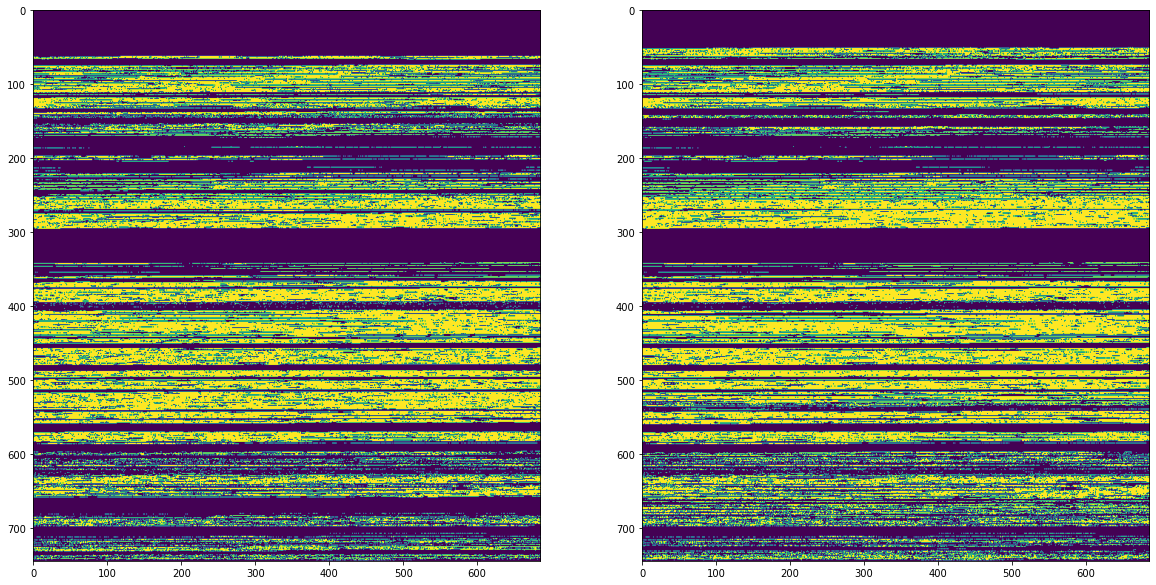

In [311]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(intersection.reshape(745,686))
plt.subplot(122)
plt.imshow(intersection_new.reshape(745,686))

## TLS

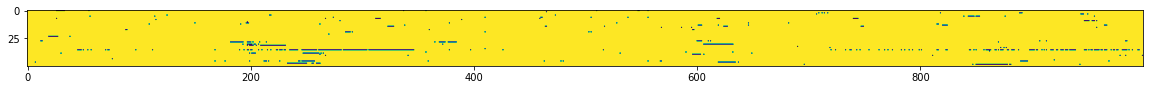

In [240]:
plt.figure(figsize=(20,10))
plt.imshow(origin_data.T[175684:176684].T)

In [312]:
# inter_locs = np.where(intersection == 1)[0]

windows = np.arange(5,20,1)
res_all = []

for window in windows:
    print(window)

    # window = 7
    res = []

    for i,item in enumerate(intersection):
        if 0 in intersection[i:i+window]:
            pass
        else:
            res.append(i)
    
    res_all.append(res)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [313]:
# inter_locs = np.where(intersection == 1)[0]

windows = np.arange(5,20,1)
res_all_new = []

for window in windows:
    print(window)

    # window = 7
    res = []

    for i,item in enumerate(intersection_new):
        if 0 in intersection_new[i:i+window]:
            pass
        else:
            res.append(i)
    
    res_all_new.append(res)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [316]:
# res_all = np.array(res_all)
for i,item in enumerate(res_all_new):
    print(windows[i],',',len(res_all[i]),',',len(item),',',(len(item)-len(res_all[i]))*100/len(item))

5 , 134436 , 142726 , 5.808332048820818
6 , 125585 , 133758 , 6.110288730393696
7 , 117668 , 125779 , 6.44861224846755
8 , 110556 , 118642 , 6.8154616409028845
9 , 104082 , 112184 , 7.22206375240676
10 , 98404 , 106578 , 7.6695002721011845
11 , 93135 , 101396 , 8.147264191881337
12 , 88214 , 96592 , 8.673596157031639
13 , 83632 , 92115 , 9.20914074797807
14 , 79353 , 87962 , 9.787180828084855
15 , 75357 , 84058 , 10.351186085797902
16 , 71584 , 80344 , 10.903116598625909
17 , 68036 , 76843 , 11.461030933201462
18 , 64705 , 73550 , 12.025832766825289
19 , 61575 , 70457 , 12.606270491221595


[[5.8  6.68 5.15 4.22 7.   6.79 6.3  5.91 6.42 6.09 7.12 6.6  6.25 5.04
  5.53 6.55 5.47 5.14 6.08 6.81 5.23 5.31 5.92 6.73 6.6  5.68 6.34 5.59
  6.62 5.08 6.85 6.85 5.78 4.65 6.98 6.64 6.73 6.77 6.02 5.37 7.03 6.14
  6.12 6.9  6.52 5.3  6.83 5.96 6.44 7.04]
 [5.78 6.74 5.14 4.19 7.02 6.87 6.25 5.98 6.38 6.14 7.12 6.61 6.23 5.08
  5.48 6.5  5.44 5.14 6.06 6.81 5.18 5.31 6.09 6.72 6.59 5.66 6.36 5.54
  6.61 5.09 6.84 6.87 5.77 4.6  6.99 6.64 6.75 6.8  6.   5.3  7.05 6.12
  6.22 6.82 6.44 5.36 6.82 6.02 6.46 7.03]
 [5.76 6.74 5.14 4.08 7.03 6.8  6.22 6.13 6.35 6.13 7.1  6.6  6.18 5.13
  5.4  6.46 5.46 5.36 6.03 6.77 5.22 5.42 6.11 6.74 6.61 5.71 6.34 5.66
  6.58 5.14 6.68 6.86 5.77 4.72 6.98 6.6  6.74 6.74 5.99 5.32 7.12 6.25
  6.23 6.82 6.4  5.3  6.76 6.04 6.46 7.02]
 [5.74 6.71 5.15 4.1  7.   6.9  6.19 6.02 6.4  6.08 7.11 6.58 6.25 5.08
  5.43 6.6  5.44 5.22 6.05 6.74 5.24 5.38 6.27 6.74 6.65 5.79 6.38 5.6
  6.55 5.18 6.64 6.83 5.75 4.66 6.94 6.61 6.68 6.8  5.99 5.44 7.02 6.23
  6.14 6

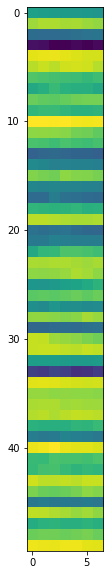

In [273]:
plt.figure(figsize=(20,10))
tmp = results.T[origin_se_ids].T[res[5]:res[5]+window]
print(tmp)
plt.imshow(tmp.T)
# plt.imshow(results_ones.T[origin_se_ids].T[res[0]:res[0]+window])